# NLP Coursework Data Analysis

## Setup

## Imports

In [2]:
import nltk
import re
import string
import json

import pandas as pd
import numpy as np

from tqdm import tqdm
from urllib import request
from operator import itemgetter
from matplotlib import pyplot as plt

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/louismanestar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/louismanestar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/louismanestar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/louismanestar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Load Dataset

In [3]:
module_url = f"https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py"
module_name = module_url.split('/')[-1]

print(f'Fetching {module_url}')
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))

Fetching https://raw.githubusercontent.com/Perez-AlmendrosC/dontpatronizeme/master/semeval-2022/dont_patronize_me.py


In [4]:
from dont_patronize_me import DontPatronizeMe

dpm = DontPatronizeMe('.', '.')
dpm.load_task1()

df = dpm.train_task1_df

print("Whole dataset info:")
print(df.shape)
print(df.columns)

patr_df = df.loc[df.label == 1]
unpatr_df = df.loc[df.label == 0]

patr_df_length = patr_df.shape[0]
unpatr_df_length = unpatr_df.shape[0]

print("Patronising and Unpatronising shapes:")
print(patr_df.shape, unpatr_df.shape)

Whole dataset info:
(10465, 7)
Index(['par_id', 'art_id', 'keyword', 'country', 'text', 'label',
       'orig_label'],
      dtype='object')
Patronising and Unpatronising shapes:
(993, 7) (9472, 7)


## Data Analysis

### General Info

#### Balance of Classes

In [5]:
def get_binary_label_distribution(df, axis):
    _, _, [patch0, patch1] = axis.hist(df.label.map(int), 
                                       bins=[-0.5, 0.5, 1.5])

    patch0.set_facecolor("tab:blue")
    patch1.set_facecolor("tab:orange")

    axis.set_xticks([0, 1], labels=["Unpatronising", "Patronising"])

def get_multi_label_distribution(df, axis):
    _, _, patches = axis.hist(df.orig_label.map(int), 
                    bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5])

    colours = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

    for patch, colour in zip(patches, colours):
        patch.set_facecolor(colour)

Text(0.5, 0, 'Levels of condescension')

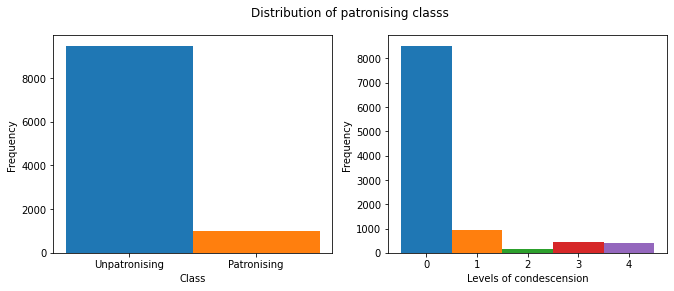

In [6]:
figure, (binary_ax, multi_ax) = plt.subplots(1, 2)

figure.suptitle("Distribution of patronising classs")
figure.set_size_inches((11, 4))

get_binary_label_distribution(df, binary_ax)

binary_ax.set_ylabel("Frequency")
binary_ax.set_xlabel("Class")

get_multi_label_distribution(df, multi_ax)

multi_ax.set_ylabel("Frequency")
multi_ax.set_xlabel("Levels of condescension")

#### Distribution of Languages

Text(0.5, 0, 'Country')

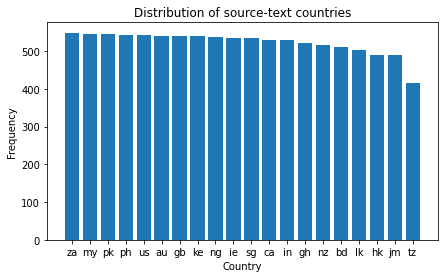

In [7]:
figure, axis = plt.subplots()

figure.set_size_inches((7, 4))

labels, counts = np.unique(df.country, return_counts=True)

label_counts = list(zip(labels, counts))
label_counts.sort(key=itemgetter(1), reverse=True)
labels_sorted, counts_sorted = zip(*label_counts)

axis.bar(np.arange(len(counts)), counts_sorted, tick_label=labels_sorted)

axis.set_title("Distribution of source-text countries")
axis.set_ylabel("Frequency")
axis.set_xlabel("Country")

### Distribution of Categories

Text(0.5, 0, 'Category')

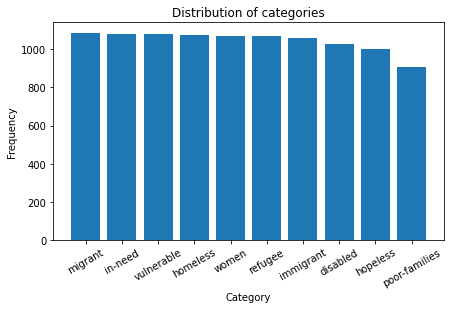

In [8]:
figure, axis = plt.subplots()

figure.set_size_inches((7, 4))

labels, counts = np.unique(df.keyword, return_counts=True)

label_counts = list(zip(labels, counts))
label_counts.sort(key=itemgetter(1), reverse=True)
labels_sorted, counts_sorted = zip(*label_counts)

axis.bar(np.arange(len(counts)), counts_sorted, tick_label=labels_sorted)

axis.tick_params(axis='x', labelrotation=30)

axis.set_title("Distribution of categories")
axis.set_ylabel("Frequency")
axis.set_xlabel("Category")

## Text Analysis

#### Average Character Length

Average number of characters for
	- patronising class: 288.45
	- unpatronising class: 265.38


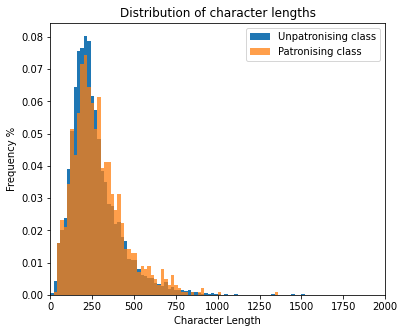

In [9]:
unpatr_series = unpatr_df.text.str.len()
patr_series = patr_df.text.str.len()

print(f"Average number of characters for"
      f"\n\t- patronising class: {patr_series.mean():.2f}"
      f"\n\t- unpatronising class: {unpatr_series.mean():.2f}")

(unpatr_counts, unpatr_bins) = np.histogram(unpatr_series, bins=100, range=(0, 2000))
(patr_counts, patr_bins) = np.histogram(patr_series, bins=100, range=(0, 2000))

figure, axis = plt.subplots()
figure.set_size_inches((6, 5))

axis.hist(unpatr_bins[:-1], unpatr_bins, alpha=1, label="Unpatronising class",
          weights=unpatr_counts / unpatr_df_length)

axis.hist(patr_bins[:-1], patr_bins, alpha=0.75, label="Patronising class",
          weights=patr_counts / patr_df_length)

axis.set_title("Distribution of character lengths")
axis.set_ylabel("Frequency %")
axis.set_xlabel("Character Length")
axis.set_xlim((0, 2000))
axis.legend()

#### Average Number of Words

Average number of words for
	- patronising class: 53.62
	- unpatronising class: 47.87
Average word length for
	- patronising class: 4.43
	- unpatronising class: 4.62


/Users/louismanestar/.pyenv/versions/3.8.12/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/louismanestar/.pyenv/versions/3.8.12/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


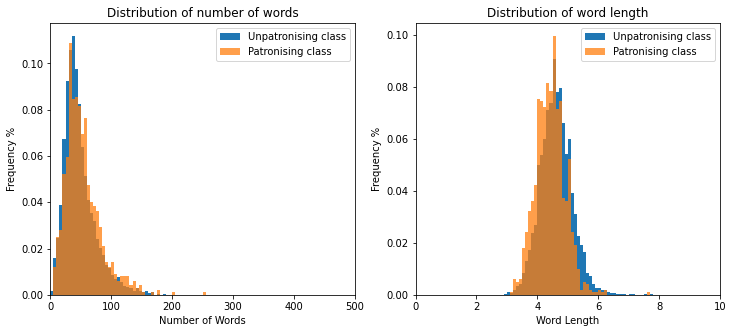

In [10]:
def get_list_length(x):
    if type(x) != list:
        x = [str(x)]

    return len(x)

unpatr_series = unpatr_df.text.str.split().map(get_list_length)
patr_series = patr_df.text.str.split().map(get_list_length)

print(f"Average number of words for"
      f"\n\t- patronising class: {patr_series.mean():.2f}"
      f"\n\t- unpatronising class: {unpatr_series.mean():.2f}")

(unpatr_counts, unpatr_bins) = np.histogram(unpatr_series, bins=100, range=(0, 500))
(patr_counts, patr_bins) = np.histogram(patr_series, bins=100, range=(0, 500))

figure, (axis1, axis2) = plt.subplots(1, 2)
figure.set_size_inches((12, 5))

axis1.hist(unpatr_bins[:-1], unpatr_bins, alpha=1, label="Unpatronising class",
          weights=unpatr_counts / unpatr_df_length)

axis1.hist(patr_bins[:-1], patr_bins, alpha=0.75, label="Patronising class",
          weights=patr_counts / patr_df_length)

axis1.set_title("Distribution of number of words")
axis1.set_ylabel("Frequency %")
axis1.set_xlabel("Number of Words")
axis1.set_xlim((0, 500))
axis1.legend()


def mean_item_length(x):
    if type(x) != list:
        x = [str(x)]
    
    lengths = list(map(len, x))
    return np.mean(lengths)

unpatr_series = unpatr_df.text.str.split().map(mean_item_length)
patr_series = patr_df.text.str.split().map(mean_item_length)

print(f"Average word length for"
      f"\n\t- patronising class: {patr_series.mean():.2f}"
      f"\n\t- unpatronising class: {unpatr_series.mean():.2f}")

(unpatr_counts, unpatr_bins) = np.histogram(unpatr_series, bins=100, range=(0, 10))
(patr_counts, patr_bins) = np.histogram(patr_series, bins=100, range=(0, 10))

axis2.hist(unpatr_bins[:-1], unpatr_bins, alpha=1, label="Unpatronising class",
          weights=unpatr_counts / unpatr_df_length)

axis2.hist(patr_bins[:-1], patr_bins, alpha=0.75, label="Patronising class",
          weights=patr_counts / patr_df_length)

axis2.set_title("Distribution of word length")
axis2.set_ylabel("Frequency %")
axis2.set_xlabel("Word Length")
axis2.set_xlim((0, 10))
axis2.legend()

#### Average Word Length

Average word length for
	- patronising dataset: 4.43
	- unpatronising dataset: 4.62


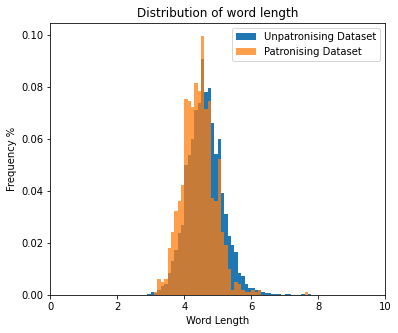

In [11]:
def mean_item_length(x):
    if type(x) != list:
        x = [str(x)]
    
    lengths = list(map(len, x))
    return np.mean(lengths)

unpatr_series = unpatr_df.text.str.split().map(mean_item_length)
patr_series = patr_df.text.str.split().map(mean_item_length)

print(f"Average word length for"
      f"\n\t- patronising dataset: {patr_series.mean():.2f}"
      f"\n\t- unpatronising dataset: {unpatr_series.mean():.2f}")

(unpatr_counts, unpatr_bins) = np.histogram(unpatr_series, bins=100, range=(0, 10))
(patr_counts, patr_bins) = np.histogram(patr_series, bins=100, range=(0, 10))

figure, axis2 = plt.subplots()
figure.set_size_inches((6, 5))

axis2.hist(unpatr_bins[:-1], unpatr_bins, alpha=1, label="Unpatronising Dataset",
          weights=unpatr_counts / unpatr_df_length)

axis2.hist(patr_bins[:-1], patr_bins, alpha=0.75, label="Patronising Dataset",
          weights=patr_counts / patr_df_length)

axis2.set_title("Distribution of word length")
axis2.set_ylabel("Frequency %")
axis2.set_xlabel("Word Length")
axis2.set_xlim((0, 10))
axis2.legend()

### $ n $-gram Analysis

In [12]:
punct_regex = re.compile(r'[\s\,\/\.\']')
lemmatizer = WordNetLemmatizer()

def remove_stop_words(token):
    return token not in stopwords.words("english")

def remove_punctuation(token):
    return not any(map(lambda s: s in string.punctuation, token))

def lemmatize(word):
    return lemmatizer.lemmatize(word, pos="v")

def get_tokenized_corpus(corpus):
    tokenized_with_punct_and_stops = list()
    tokenized_corpus = list()

    for sentence in tqdm(corpus, unit="sentence"):
        tokens = wordpunct_tokenize(sentence)
        tokens = list(map(lemmatize, tokens))

        tokenized_with_punct_and_stops.append(tokens)

        tokens = filter(remove_punctuation, tokens)
        tokens = filter(remove_stop_words, tokens)

        tokenized_corpus.append(list(tokens))
        
    return {
        "no_punct_or_stops": tokenized_corpus, 
        "lemmatized_only": tokenized_with_punct_and_stops
    }

patr_corpus = get_tokenized_corpus(patr_df["text"])
unpatr_corpus = get_tokenized_corpus(unpatr_df["text"])

complete_corpus = {
    "no_punct_or_stops": patr_corpus["no_punct_or_stops"] \
        + unpatr_corpus["no_punct_or_stops"], 
    "lemmatized_only": patr_corpus["lemmatized_only"] \
        + unpatr_corpus["lemmatized_only"]
}

"""
with open("corpus/tokenised_corpus.json", "w") as f:
    json.dump(complete_corpus, f, indent=4)

with open("corpus/patronising_tokenised_corpus.json", "w") as f:
    json.dump(patr_corpus, f, indent=4)

with open("corpus/unpatronising_tokenised_corpus.json", "w") as f:
    json.dump(unpatr_corpus, f, indent=4)
"""

patr_corpus = patr_corpus.get("no_punct_or_stops")
unpatr_corpus = unpatr_corpus.get("no_punct_or_stops")

100%|██████████| 9472/9472 [00:25<00:00, 368.28sentence/s]


In [13]:
def get_n_gram_frequency(n, sentences, rounding=4):
    n_grams = dict()

    for i, sentence in enumerate(sentences):
        for j in range(len(sentence) + 1 - n):
            n_gram = " ".join(sentence[j:j+n]).lower()

            if n_gram in n_grams:
                n_grams[n_gram] += 1
            else:
                n_grams[n_gram] = 1

            """
            if n_gram in n_grams:
                n_grams[n_gram]["count"] += 1
                n_grams[n_gram]["refs"].append((i, j))
            else:
                n_grams[n_gram] = {
                    "count": 1,
                    "refs": [(i, j)]
                }
            """
    
    for key, val in n_grams.items():
        n_grams[key] = round(val, rounding)
    
    return n_grams

def to_tuple(dictionary):
    return list(zip(dictionary.keys(), dictionary.values()))
    """
    keys = dictionary.keys()

    counts = map(itemgetter("count"), dictionary.values())
    refs = map(itemgetter("refs"), dictionary.values())
    
    return list(zip(keys, counts, refs))
    """


def find_matching_n_grams(corpus_a, corpus_b, n, k=25, rounding=4):
    a_n_grams = get_n_gram_frequency(n, corpus_a, rounding=rounding)
    b_n_grams = get_n_gram_frequency(n, corpus_b, rounding=rounding)

    common_a_n_grams = sorted(to_tuple(a_n_grams), 
                              key=itemgetter(1),
                              reverse=True)[:k]

    common_b_n_grams = sorted(to_tuple(b_n_grams), 
                              key=itemgetter(1),
                              reverse=True)[:k]

    common_a_strings = set(map(itemgetter(0), common_a_n_grams))
    common_b_strings = set(map(itemgetter(0), common_b_n_grams))

    common_n_grams = set.intersection(common_a_strings, common_b_strings)
    common_a_not_b = common_a_strings.difference(common_b_strings)
    common_b_not_a = common_b_strings.difference(common_a_strings)

    def common_n_gram_counts(n_gram):
        a_count = a_n_grams.get(n_gram, 0)
        b_count = b_n_grams.get(n_gram, 0)
        
        if b_count != 0:
            ratio = (len(corpus_b) * a_count) / (len(corpus_a) * b_count)
            ratio = round(ratio, rounding)
        else:
            ratio = None
        return (n_gram, a_count, b_count, ratio)

    common_n_grams = list(map(common_n_gram_counts, common_n_grams))
    common_a_not_b = list(map(common_n_gram_counts, common_a_not_b))
    common_b_not_a = list(map(common_n_gram_counts, common_b_not_a))

    return common_n_grams, common_a_not_b, common_b_not_a

In [14]:
n_gram_analysis = dict()

for n in range(1, 5):
    common_n_grams, common_a_not_b, \
    common_b_not_a = find_matching_n_grams(patr_corpus, unpatr_corpus, n)

    """
    n_gram_analysis[n] = {
        "common_n_grams": common_n_grams,
        "common_a_not_b": common_a_not_b,
        "common_b_not_a": common_b_not_a
    }
    """

    print(f"Common {n}-grams between patronising and non-patronising datasets")
    print(common_n_grams)

    print(f"Common {n}-grams in the patronising dataset but not in the non-patronising dataset.")
    print(common_a_not_b)

    print(f"Common {n}-grams in the non-patronising dataset but not in the patronising dataset.")
    print(common_b_not_a)

"""
with open("results/n_gram_analysis", "w") as f:
    json.dump(n_gram_analysis, f, indent=4)
"""

Common 1-grams between patronising and non-patronising datasets
[('would', 90, 724, 1.1858), ('work', 98, 690, 1.3548), ('families', 212, 1129, 1.7912), ('people', 260, 1602, 1.5481), ('the', 244, 2850, 0.8167), ('children', 199, 840, 2.2598), ('vulnerable', 97, 1107, 0.8358), ('refugees', 95, 871, 1.0404), ('poor', 234, 956, 2.3348), ('i', 222, 1250, 1.6941), ('homeless', 177, 858, 1.9678), ('disable', 104, 1033, 0.9603), ('many', 92, 697, 1.2591), ('need', 275, 1419, 1.8486), ('women', 146, 1572, 0.8859), ('say', 244, 2539, 0.9167), ('make', 105, 836, 1.1981)]
Common 1-grams in the patronising dataset but not in the non-patronising dataset.
[('live', 161, 593, 2.5898), ('help', 192, 551, 3.3239), ('come', 90, 546, 1.5723), ('get', 88, 490, 1.7131), ('give', 135, 433, 2.974), ('we', 93, 446, 1.989), ('life', 99, 253, 3.7326), ('n', 89, 635, 1.3369)]
Common 1-grams in the non-patronising dataset but not in the patronising dataset.
[('one', 79, 874, 0.8622), ('new', 62, 746, 0.7928), ('

'\nwith open("results/n_gram_analysis", "w") as f:\n    json.dump(n_gram_analysis, f, indent=4)\n'